In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1)) # 1st hiddenlayer activation function using sigmoid
    A = Z.dot(W2) + b2 # output activation function
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims = True)  # softmax activation function
    return Y, Z

In [31]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [32]:
def derivative_w2(Z, T, Y):
    #N, K = T.shape
    #M = Z.shape[1]  # how many hidden units
    
    # Slow
    #ret1 = np.zeros((M, K))  # this is the shape of W2
    #for n in range(N):
    #    for m in range(M):
    #        for k in range(K):
    #            ret1[m, k] += (T[n, k] - Y[n, k])*Z[n, m] # since we are doing gradient ascent
                
    #ret2 = np.zeros((M, K))
    #for n in range(N):
    #    for k n range(K):
    #        ret2[:, k] += (T[n, k] - Y[n, k])*Z[n, :] # choosing all the m's at the same time
            
    #assert(np.abs(ret1 - ret2).sum() < 10e-10)
    
    #ret3 = np.zeros((M, K))
    #for n in range(N):
    #    ret3 += np.outer(Z[n], T[n] - Y[n])
    
    #assert(np.abs(ret2 - ret3).sum() < 10e-10)  # ret2 should be very close to ret3
    
    #ret4 = Z.T.dot(T - Y)  # so, the result would be M x K
    #assert(np.abs(ret3 - ret4).sum() < 10e-10)  # ret3 should be very close to ret4
    
    return Z.T.dot(T - Y)

def derivative_b2(T, Y):
    return (T - Y).sum(axis = 0)

def derivative_w1(X, Z, T, Y, W2):
    #N, D = X.shape
    #M, K = W2.shape
    
    # Slow
    #ret1 = np.zeros((D, M)) # this is the shape of W1
    #for n in range(N):
    #    for k in range(K):
    #        for m in range(M):
    #            for d in range(D):
    #                ret1[d, m] += (T[n, k] - Y[n, k])*W2[m, k]*Z[n, m]*(1 - Z[n, m])*X[n, d]
    
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    return X.T.dot(dZ)
    
    #return ret1

def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z*(1 - Z)).sum(axis = 0)

In [33]:
def cost(T, Y):
    tot = T*np.log(Y) # multinomial distribution
    return tot.sum()

In [34]:
def main():
    # create the data
    Nclass = 500 # 500 observations per class
    D = 2 # dimensionality of input
    M = 3 # hidden layer size
    K = 3 # number of classes
    
    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    
    X = np.vstack([X1, X2, X3])
    
    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    
    N = len(Y)
    T = np.zeros((N, K)) # indicator variables to store Y
    for i in range(N):
        T[i, Y[i]] = 1  # one-hot encoding for the targets
        
    plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, alpha = 0.5)
    plt.show()
    
    ## Randomly initialize the weights
    W1 = np.random.randn(D, M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M, K)
    b2 = np.random.randn(K)
    
    learning_rate = 10e-7 # 10 to the power -7
    costs = []  # costs function if we can plot it afterwards
    for epoch in range(100000):
        output, hidden = forward(X, W1, b1, W2, b2)  # calling the forward function
        if epoch % 100 == 0: # for every 100 epochs we are going to calculate the cost
            c = cost(T, output)  # we will write this function later
            P = np.argmax(output, axis = 1)  # get the predictions from the probability values of the output (n x k)
            r = classification_rate(Y, P) # takes Targets and Predictions
            print("cost: ", c, "classification_rate: ", r)
            costs.append(c)
            
        # Perform Gradient Ascent-
        W2 += learning_rate * derivative_w2(hidden, T, output)
        b2 += learning_rate * derivative_b2(T, output)
        W1 += learning_rate * derivative_w1(X,  hidden, T, output, W2)
        b1 += learning_rate * derivative_b1(T, output, W2, hidden)
        
    plt.plot(costs)
    plt.show()

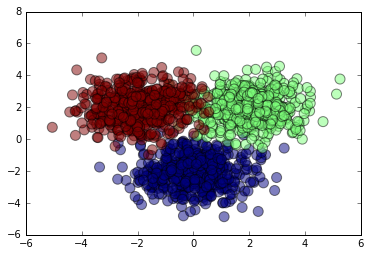

cost:  -2066.55101972 classification_rate:  0.402
cost:  -2019.20172507 classification_rate:  0.4126666666666667
cost:  -1975.17911844 classification_rate:  0.4266666666666667
cost:  -1934.09987519 classification_rate:  0.43466666666666665
cost:  -1895.63150406 classification_rate:  0.44666666666666666
cost:  -1859.4877538 classification_rate:  0.456
cost:  -1825.4234027 classification_rate:  0.4653333333333333
cost:  -1793.22894469 classification_rate:  0.4686666666666667
cost:  -1762.72550195 classification_rate:  0.47933333333333333
cost:  -1733.76015507 classification_rate:  0.486
cost:  -1706.20178297 classification_rate:  0.49
cost:  -1679.9374393 classification_rate:  0.492
cost:  -1654.86925028 classification_rate:  0.494
cost:  -1630.91179538 classification_rate:  0.496
cost:  -1607.9899202 classification_rate:  0.494
cost:  -1586.03692701 classification_rate:  0.494
cost:  -1564.99308907 classification_rate:  0.494
cost:  -1544.80443828 classification_rate:  0.494666666666666

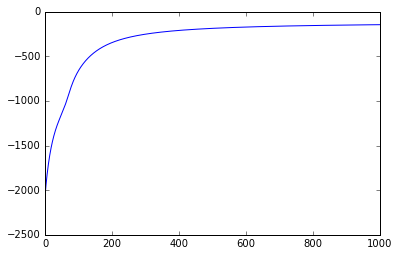

In [35]:
if __name__ == '__main__':
    main()